## Import Packaging

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from textblob import TextBlob
import string
import ipywidgets
from ipywidgets import interact
import seaborn as sns

plt.rcParams['figure.figsize'] = (15,5)
plt.style.use('fivethirtyeight')

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Data Engineering

In [3]:
data = pd.read_csv(r'Datasets\drugsComTest_raw.csv')
data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4


In [4]:
data.shape

(53766, 7)

In [5]:
data.describe()

,uniqueID,rating,usefulCount
count,53766.000000,53766.000000,53766.000000
mean,116386.701187,6.976900,27.989752
std,67017.739881,3.285207,36.172833
min,0.000000,1.000000,0.000000
25%,58272.500000,4.000000,6.000000
50%,116248.500000,8.000000,16.000000
75%,174586.750000,10.000000,36.000000
max,232284.000000,10.000000,949.000000


In [6]:
data.nunique()

uniqueID       53766
drugName        2637
condition        708
review         48280
rating            10
date            3566
usefulCount      325
dtype: int64

In [8]:
# Avg rating of zero usefull drug

data[data['usefulCount'] == 0]['rating'].mean()

5.869001919385797

In [9]:
# Avg rating of usefull greater than 900 drug

data[data['usefulCount'] > 900]['rating'].mean()

9.0

In [10]:
data[data['usefulCount'] > 900]['rating']

3829    9
Name: rating, dtype: int64

In [11]:
data[data['usefulCount'] > 900]

,uniqueID,drugName,condition,review,rating,date,usefulCount
3829,96615,Sertraline,Depression,"""I&#039;ve been on Zoloft 50mg for over two ye...",9,5-Aug-08,949


In [12]:
data[data['drugName'] == 'Mirena']['usefulCount'].mean()

12.642691415313225

In [13]:
data[['drugName' , 'condition' , 'review']].describe(include= object)

,drugName,condition,review
count,53766,53471,53766
unique,2637,708,48280
top,Levonorgestrel,Birth Control,"""Good."""
freq,1273,9648,8


In [14]:
data.isnull().sum()

uniqueID         0
drugName         0
condition      295
review           0
rating           0
date             0
usefulCount      0
dtype: int64

In [15]:
data.dropna(inplace = True)

In [16]:
data.isnull().sum()

uniqueID       0
drugName       0
condition      0
review         0
rating         0
date           0
usefulCount    0
dtype: int64

D:\Anaconda\envs\nlp\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\envs\nlp\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


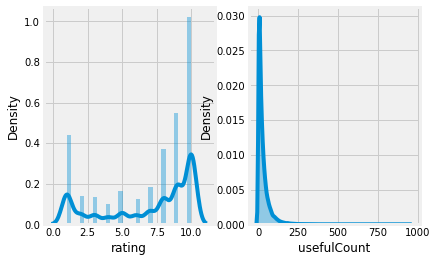

In [17]:
plt.subplot(1,2,1)
sns.distplot(data['rating'])

plt.subplot(1,2,2)
sns.distplot(data['usefulCount'])

plt.show()

D:\Anaconda\envs\nlp\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


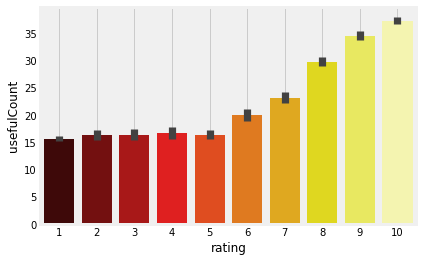

In [18]:
sns.barplot(data['rating'] ,  data['usefulCount'] , palette = 'hot')
plt.grid()
plt.show()

In [19]:
data['Len'] = data['review'].apply(len)

In [20]:
data[['rating', 'Len']].groupby(['rating']).agg(['min' , 'mean' , 'max'])

Len                  
       min        mean   max
rating                      
1        5  427.267447  3103
2       14  458.453959  2376
3        8  449.259445  2142
4        5  468.612667  1558
5       10  480.199926  2010
6        4  471.655566  2202
7        6  482.972358  1266
8        6  479.849134  1603
9        3  476.221930  2733
10       6  445.299994  6192

In [21]:
# Removing punctuation

def punc_rmv(text):
    clean_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(clean_list)
    return clean_str

In [22]:
data['review'] = data['review'].apply(punc_rmv)

In [23]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop =  stopwords.words('english')
stop.append("i'm")

stop_words = []

for item in stop:
    new_item = punc_rmv(item)
    stop_words.append(new_item)
    
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 'youre',
 'youve',
 'youll',
 'youd',
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 'shes',
 'her',
 'hers',
 'herself',
 'it',
 'its',
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 'thatll',
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'fe

In [24]:
def stopwords_removal(text):
    text = word_tokenize(text)
    return [word.lower() for word in text if word not in stop_words]

In [25]:
data['review'] = data['review'].apply(stopwords_removal)

In [26]:
data['review'].head()

0    [i039ve, tried, antidepressants, years, citalo...
1    [my, son, crohn039s, disease, done, well, asac...
2                         [quick, reduction, symptoms]
3    [contrave, combines, drugs, used, alcohol, smo...
4    [i, birth, control, one, cycle, after, reading...
Name: review, dtype: object

In [27]:
data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,Len
0,163740,Mirtazapine,Depression,"[i039ve, tried, antidepressants, years, citalo...",10,28-Feb-12,22,439
1,206473,Mesalamine,"Crohn's Disease, Maintenance","[my, son, crohn039s, disease, done, well, asac...",8,17-May-09,17,268
2,159672,Bactrim,Urinary Tract Infection,"[quick, reduction, symptoms]",9,29-Sep-17,3,29
3,39293,Contrave,Weight Loss,"[contrave, combines, drugs, used, alcohol, smo...",9,5-Mar-17,35,782
4,97768,Cyclafem 1 / 35,Birth Control,"[i, birth, control, one, cycle, after, reading...",9,22-Oct-15,4,762


In [28]:
import re

In [29]:
def drop_num(text):
    list_new_text=[]
    for i in text:
        if not re.search(r'\d',i):
            list_new_text.append(i)
            
    return ' '.join(list_new_text)

In [30]:
data['review'] = data['review'].apply(drop_num)

## Sentiment Analysis

In [32]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import numpy as np

In [33]:
sid = SentimentIntensityAnalyzer()

train_sentiments = []

for i in data['review']:
    train_sentiments.append(sid.polarity_scores(i).get('compound'))
    
train_sentiments = np.asarray(train_sentiments)

In [34]:
sid.polarity_scores(data['review'][4])

{'neg': 0.027, 'neu': 0.72, 'pos': 0.252, 'compound': 0.9549}

In [35]:
data['sentiment'] = pd.Series(data = train_sentiments)

In [36]:
data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,Len,sentiment
0,163740,Mirtazapine,Depression,tried antidepressants years citalopram fluoxet...,10,28-Feb-12,22,439,0.7623
1,206473,Mesalamine,"Crohn's Disease, Maintenance",my son disease done well asacol he complaints ...,8,17-May-09,17,268,0.4767
2,159672,Bactrim,Urinary Tract Infection,quick reduction symptoms,9,29-Sep-17,3,29,0.0000
3,39293,Contrave,Weight Loss,contrave combines drugs used alcohol smoking o...,9,5-Mar-17,35,782,0.8122
4,97768,Cyclafem 1 / 35,Birth Control,i birth control one cycle after reading review...,9,22-Oct-15,4,762,0.9549


In [37]:
data[['rating', 'sentiment']].groupby(['rating']).agg(['min' , 'mean' , 'max'])

sentiment                  
             min      mean     max
rating                            
1        -0.9938 -0.018202  0.9935
2        -0.9950 -0.010026  0.9888
3        -0.9925 -0.010093  0.9889
4        -0.9914 -0.031845  0.9871
5        -0.9880  0.008297  0.9842
6        -0.9894  0.001177  0.9893
7        -0.9916 -0.017403  0.9908
8        -0.9941  0.004206  0.9935
9        -0.9983  0.004026  0.9875
10       -0.9949  0.001291  0.9935

In [38]:
df = data.drop(['date','uniqueID','sentiment','review','Len'] , axis = 1)
df.head()

,drugName,condition,rating,usefulCount
0,Mirtazapine,Depression,10,22
1,Mesalamine,"Crohn's Disease, Maintenance",8,17
2,Bactrim,Urinary Tract Infection,9,3
3,Contrave,Weight Loss,9,35
4,Cyclafem 1 / 35,Birth Control,9,4


In [39]:
df.nunique()

drugName       2635
condition       708
rating           10
usefulCount     325
dtype: int64

In [40]:
min_rating = data['rating'].min()
max_rating = data['rating'].max()

def scale_rating(rating):
    rating -= min_rating
    rating = rating/(max_rating - 1)
    rating *= 5
    rating = int(round(rating , 0))
    
    if(int(rating <= 2)):
        return 0
    else:
        return 1

In [41]:
df['eff_score'] = df['rating'].apply(scale_rating)

In [42]:
df['usefulness'] = df['rating']*df['usefulCount']*df['eff_score']

In [43]:
df[['drugName','condition','usefulness']][df['usefulness'] >
                                          df['usefulness'].mean()].sort_values(by = 'usefulness',ascending=False).head(10).reset_index(drop=True)

,drugName,condition,usefulness
0,Sertraline,Depression,8541
1,Etonogestrel,Birth Control,7300
2,Sertraline,Depression,6800
3,Oxycodone,Pain,6255
4,OxyContin,Pain,6255
5,Cymbalta,Depression,6210
6,Sertraline,Depression,5796
7,Buspirone,Anxiety,5265
8,Citalopram,Depression,5031
9,Prozac,Anxiety and Stress,4860


In [44]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [52]:
@interact
def check(condition = list(df['condition'].value_counts().index)):
    return df[df['condition'] == condition]['eff_score'].value_counts()

interactive(children=(Dropdown(description='condition', options=('Birth Control', 'Depression', 'Pain', 'Anxie…

In [54]:
df['condition'].value_counts().index[:15]

Index(['Birth Control', 'Depression', 'Pain', 'Anxiety', 'Acne',
       'Bipolar Disorde', 'Weight Loss', 'Insomnia', 'Obesity', 'ADHD',
       'Emergency Contraception', 'Vaginal Yeast Infection',
       'Diabetes, Type 2', 'High Blood Pressure', 'Smoking Cessation'],
      dtype='object')

In [55]:
popular_conditions = ('Birth Control', 'Depression', 'Pain', 'Anxiety', 'Acne',
       'Bipolar Disorde', 'Weight Loss', 'Insomnia', 'Obesity', 'ADHD',
       'Emergency Contraception', 'Vaginal Yeast Infection',
       'Diabetes, Type 2', 'High Blood Pressure', 'Smoking Cessation')

conditions = df.loc[data['condition'].isin(popular_conditions)]
conditions

,drugName,condition,rating,usefulCount,eff_score,usefulness
0,Mirtazapine,Depression,10,22,1,220
3,Contrave,Weight Loss,9,35,1,315
4,Cyclafem 1 / 35,Birth Control,9,4,1,36
6,Copper,Birth Control,6,1,1,6
9,Levora,Birth Control,2,3,0,0
...,...,...,...,...,...,...
53759,Microgestin Fe 1 / 20,Birth Control,6,15,1,90
53760,Apri,Birth Control,9,18,1,162
53762,Escitalopram,Anxiety,9,11,1,99
53763,Levonorgestrel,Birth Control,8,7,1,56


In [56]:
conditions.shape

(28661, 6)

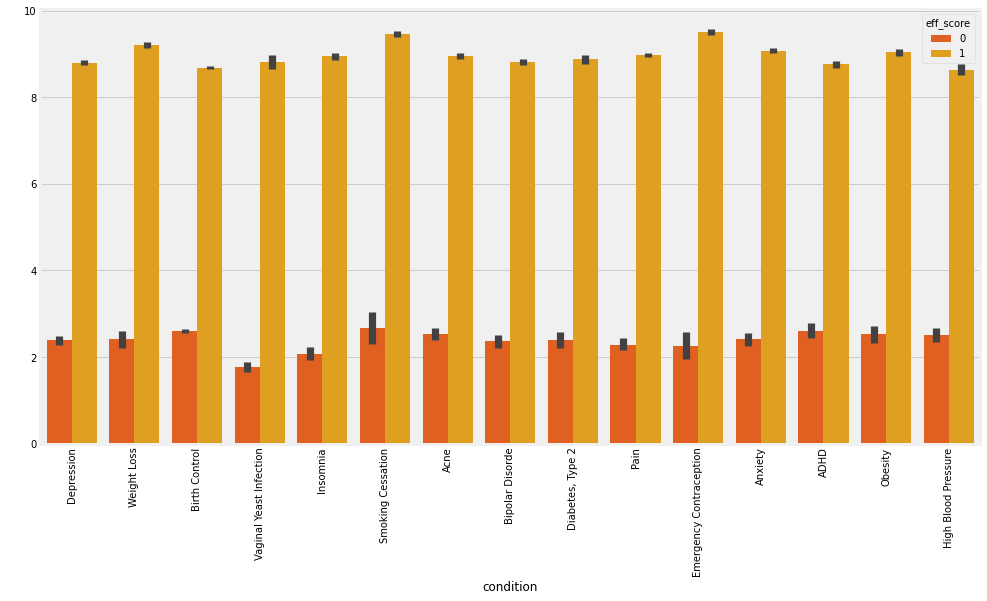

In [58]:
plt.figure(figsize = (15,8))

sns.barplot(x=conditions['condition'],y=conditions['rating'],hue=df['eff_score'],palette='autumn')
plt.xticks(rotation=90)
plt.ylabel(' ')
plt.show()

In [60]:
df[['drugName','usefulCount']][df['usefulCount'] > df['usefulCount'].mean()].sort_values(by='usefulCount',ascending = 
                                                                                       False).head(10).reset_index(drop = True)

,drugName,usefulCount
0,Sertraline,949
1,Etonogestrel,730
2,OxyContin,695
3,Oxycodone,695
4,Sertraline,680
5,Sertraline,644
6,Cymbalta,621
7,Buspirone,585
8,Citalopram,559
9,Vilazodone,513


In [61]:
df = df.drop_duplicates()

In [63]:
@interact
def high_low_rate(condition=list(df['condition'].value_counts().index)):
    print("\n Top 5 Drugs")
    print(df[df['condition']==condition][['drugName','usefulness']].sort_values(by='usefulness',
                            ascending = False).head().reset_index(drop=True))
    print("\n Top 5 Drugs")
    print(df[df['condition']==condition][['drugName','usefulness']].sort_values(by='usefulness',
                            ascending = True).head().reset_index(drop=True))

interactive(children=(Dropdown(description='condition', options=('Birth Control', 'Depression', 'Pain', 'Anxie…